In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
arq = pd.read_csv('vgsales.csv')

In [4]:
arq = arq.fillna(0)
arq =arq.astype({"Year":  int})
arq

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Análise exploratória do atributo Genre

In [6]:
Genre = arq.iloc[:,4:5]
Genre = Genre.sort_values("Genre")
Genre_counter = Counter(Genre["Genre"])
Genre_counter

Counter({'Action': 3316,
         'Adventure': 1286,
         'Fighting': 848,
         'Misc': 1739,
         'Platform': 886,
         'Puzzle': 582,
         'Racing': 1249,
         'Role-Playing': 1488,
         'Shooter': 1310,
         'Simulation': 867,
         'Sports': 2346,
         'Strategy': 681})

## Genre Top Geral

In [33]:
Genre_top = Genre_counter.most_common()
Genre=pd.DataFrame(Genre_top, columns=["Genre","Count"])
Genre

,Genre,Count
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


## Visualização

<AxesSubplot:xlabel='Genre', ylabel='Count'>

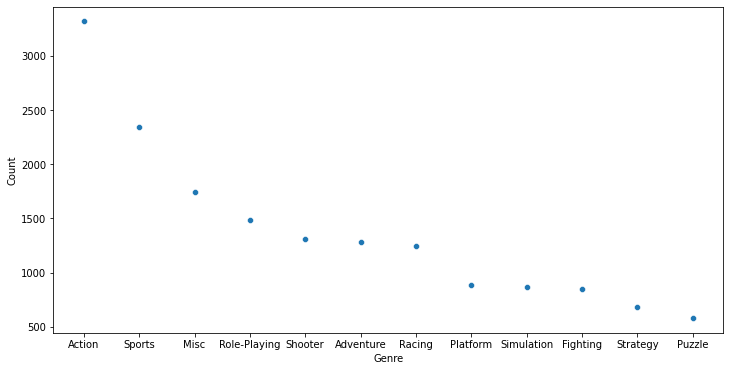

In [19]:
#CASO QUEIRA OS GENEROS NO EIXO X E OS VALORES NO EIXO Y
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Genre, x="Genre", y="Count")
#sns.scatterplot(data=Genre, x="Count", y="Genre")

## Colorindo agrupamento


<AxesSubplot:xlabel='Genre', ylabel='Count'>

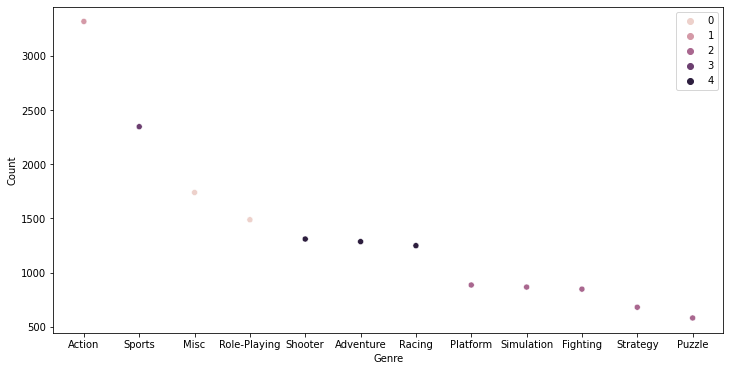

In [40]:
Genre_group=Genre[["Count","Count"]]
Kmeans=KMeans(n_clusters=5)
Kmeans.fit(Genre_group)
Kmeans.labels_
#sns.scatterplot(data=Genre, x="Count", y="Genre", hue=Kmeans.labels_)
#CASO QUEIRA OS GENEROS NO EIXO X E OS VALORES NO EIXO Y
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Genre, x="Genre", y="Count", hue=Kmeans.labels_)

### Note que o gráfico mostra os gêneros dos jogos mais frequêntes e agrupam eles por cores utilizando o K-means.